In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

In [2]:
os.chdir('c:\\Users\\quinn\\Sberbank') 

In [3]:
train=pd.read_csv('trainVariables2.csv')

In [4]:
train.fillna(train.median(), inplace = True)

In [5]:
q=train['full_sq'].quantile(.99)
data_1=train[train['full_sq']<q]

In [6]:
r=data_1['floor'].quantile(.99)
data_2=data_1[data_1['floor']<r]

In [8]:
s=data_2['floor'].quantile(.99)
data_3=data_2[data_2['floor']<r]

In [9]:
t=data_3['kremlin_km'].quantile(.99)
data_4=data_3[data_3['kremlin_km']<t]

In [10]:
u=data_4['price_doc'].quantile(.99)
data_5=data_4[data_4['price_doc']<u]

In [11]:
new_data=data_5.reset_index(drop=True)

In [12]:
x=new_data.iloc[:, :-1].values
y=new_data.iloc[:, -1].values

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
regressor = RandomForestRegressor(n_estimators=10, random_state = 101)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=101, verbose=0, warm_start=False)

In [16]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test), 1)), 1))

[[5712000.  5800000. ]
 [5645000.  2500000. ]
 [4772040.1 5007939. ]
 ...
 [5310000.  6400000. ]
 [7890496.  8413570. ]
 [3003262.8 2956200. ]]


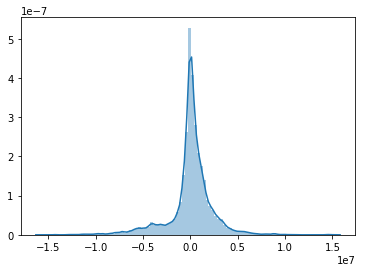

In [19]:
sns.distplot((y_test-y_pred), bins = 100)

In [20]:
from sklearn import metrics

In [21]:
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE 2356970.681416782


In [22]:
metrics.r2_score(y_test, y_pred)

0.4887374225582095